In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [17]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [18]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [19]:
median_y = np.median(y)
y_binary = (y >= median_y).astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_single = X_train_scaled[:, 0].reshape(-1, 1)
X_test_single = X_test_scaled[:, 0].reshape(-1, 1)

In [28]:
model_single = LogisticRegression()
model_single.fit(X_train_single, y_train)
y_pred_single = model_single.predict(X_test_single)
acc_single = accuracy_score(y_test, y_pred_single)
y_prob_single = model_single.predict_proba(X_test_single)[:, 1]

In [29]:
model_multi = LogisticRegression()
model_multi.fit(X_train_scaled, y_train)
y_pred_multi = model_multi.predict(X_test_scaled)
acc_multi = accuracy_score(y_test, y_pred_multi)
y_prob_multi = model_multi.predict_proba(X_test_scaled)[:, 1]

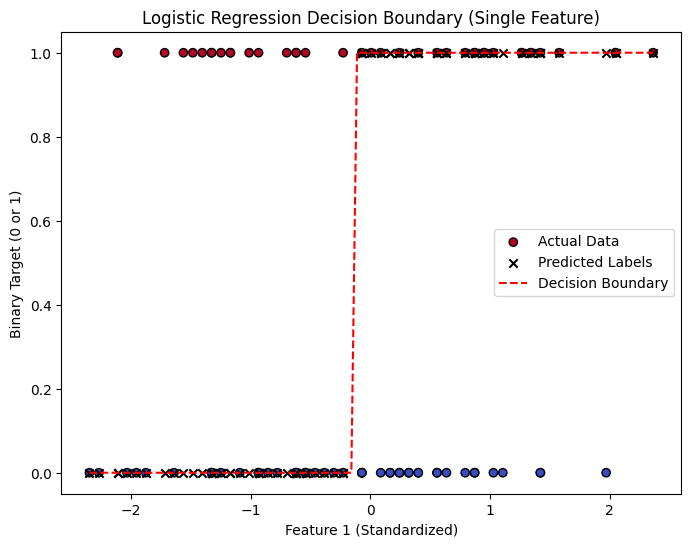

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_single, y_test, c=y_test, cmap="coolwarm", edgecolors='k', label="Actual Data")
plt.scatter(X_test_single, y_pred_single, marker="x", color="black", label="Predicted Labels")
x_vals = np.linspace(X_test_single.min(), X_test_single.max(), 100).reshape(-1, 1)
y_vals = model_single.predict(x_vals)
plt.plot(x_vals, y_vals, color='red', linestyle="--", label="Decision Boundary")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Binary Target (0 or 1)")
plt.title("Logistic Regression Decision Boundary (Single Feature)")
plt.legend()
plt.show()

In [31]:
fpr_single, tpr_single, _ = roc_curve(y_test, y_prob_single)
roc_auc_single = auc(fpr_single, tpr_single)

In [32]:
fpr_multi, tpr_multi, _ = roc_curve(y_test, y_prob_multi)
roc_auc_multi = auc(fpr_multi, tpr_multi)

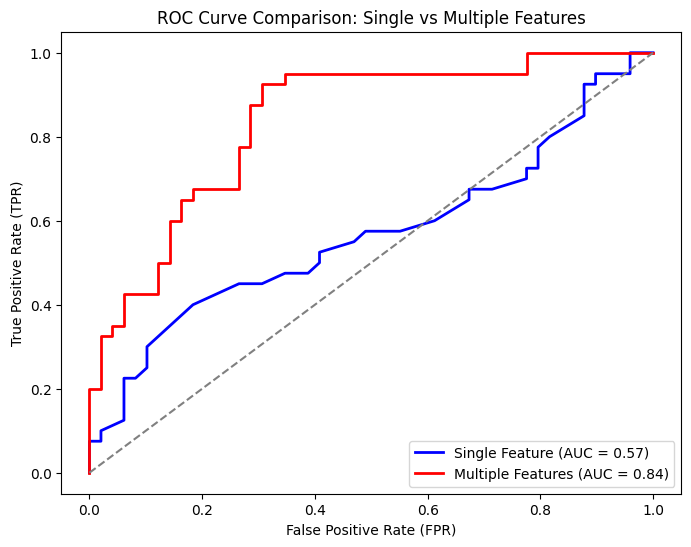

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_single, tpr_single, color="blue", lw=2, label=f"Single Feature (AUC = {roc_auc_single:.2f})")
plt.plot(fpr_multi, tpr_multi, color="red", lw=2, label=f"Multiple Features (AUC = {roc_auc_multi:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Single vs Multiple Features")
plt.legend(loc="lower right")
plt.show()

<ipython-input-34-28c5c08aecec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Single Feature", "Multiple Features"], y=[acc_single, acc_multi], palette="viridis")


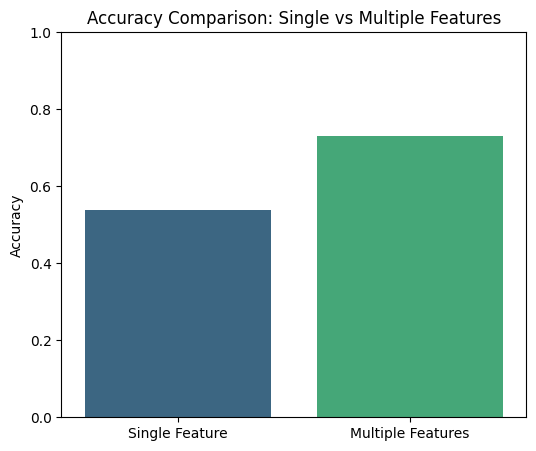

In [34]:
plt.figure(figsize=(6, 5))
sns.barplot(x=["Single Feature", "Multiple Features"], y=[acc_single, acc_multi], palette="viridis")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Single vs Multiple Features")
plt.ylim(0, 1)
plt.show()

In [35]:
print(f"Accuracy with Single Feature: {acc_single:.4f}")
print(f"Accuracy with Multiple Features: {acc_multi:.4f}")

Accuracy with Single Feature: 0.5393
Accuracy with Multiple Features: 0.7303
